<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Load-Data" data-toc-modified-id="1.-Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Load Data</a></span></li><li><span><a href="#2.-EDA" data-toc-modified-id="2.-EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. EDA</a></span></li><li><span><a href="#3.-Logistic-Regression-Model" data-toc-modified-id="3.-Logistic-Regression-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. Logistic Regression Model</a></span><ul class="toc-item"><li><span><a href="#3.1-Use-Logistic-Regression" data-toc-modified-id="3.1-Use-Logistic-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>3.1 Use Logistic Regression</a></span></li></ul></li><li><span><a href="#4.-Support-Vector-Machine" data-toc-modified-id="4.-Support-Vector-Machine-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>4. Support Vector Machine</a></span><ul class="toc-item"><li><span><a href="#4.1-Use-Support-Vector-Machine" data-toc-modified-id="4.1-Use-Support-Vector-Machine-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>4.1 Use Support Vector Machine</a></span></li></ul></li><li><span><a href="#4.-Naive-Bayes" data-toc-modified-id="4.-Naive-Bayes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>4. Naive Bayes</a></span><ul class="toc-item"><li><span><a href="#4.1-Use-Naive-Bayes" data-toc-modified-id="4.1-Use-Naive-Bayes-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>4.1 Use Naive Bayes</a></span></li></ul></li><li><span><a href="#6-Gridsearch-optimal-parameters-for-all-three-models." data-toc-modified-id="6-Gridsearch-optimal-parameters-for-all-three-models.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>6 Gridsearch optimal parameters for all three models.</a></span><ul class="toc-item"><li><span><a href="#6.1-Find-Best-Estimator-For-Logistic-Regression" data-toc-modified-id="6.1-Find-Best-Estimator-For-Logistic-Regression-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>6.1 Find Best Estimator For Logistic Regression</a></span></li><li><span><a href="#6.2-Find-Best-Estimator-For-SVM" data-toc-modified-id="6.2-Find-Best-Estimator-For-SVM-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>6.2 Find Best Estimator For SVM</a></span></li><li><span><a href="#6.3-Plot-the-ROC-curve-for-the-SVM,-Logistic-Regressions-and-Naive-Bayes-on-the-same-plot" data-toc-modified-id="6.3-Plot-the-ROC-curve-for-the-SVM,-Logistic-Regressions-and-Naive-Bayes-on-the-same-plot-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>6.3 Plot the ROC curve for the SVM, Logistic Regressions and Naive Bayes on the same plot</a></span></li></ul></li><li><span><a href="#6.-[BONUS]-Learning-Curve" data-toc-modified-id="6.-[BONUS]-Learning-Curve-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>6. [BONUS] Learning Curve</a></span></li></ul></div>

![alt text](https://i.imgur.com/1WaY7aA.png)

# Lab 5.3.1 
# *Support Vector Machines*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features. 

The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classificaiton problems. These transforms are called *kernels*.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# transform data
from sklearn.preprocessing import StandardScaler

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# ML evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

In [59]:
def plot_confusion_matrix(y_test, preds, figsize=(6, 6), cmap=None, normalize=False):
    
    df = pd.DataFrame({'Actual': y_test, 
                       'Predicted': preds})
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    
    if normalize == True:
        cmat = pd.crosstab(df['Actual'], df['Predicted'], margins=False, normalize='all')
        # Plot confusion matrix
        sns.heatmap(cmat, cmap=cmap, annot=True, ax=ax)
    else:
        cmat = pd.crosstab(df['Actual'], df['Predicted'], margins=False)
        # Plot confusion matrix
        sns.heatmap(cmat, cmap=cmap, annot=True, fmt='d', ax=ax)
    
    return ax

In [68]:
def plot_roc_ax(y_test, preds_proba, ax=ax):
    
    # Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = roc_curve(y_test, preds_proba)

    # Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
    roc_auc = auc(fpr, tpr)

    # Plot the ROC Curve

    lw = 2
    ax.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    ax.legend(loc = "lower right")
    
    return ax

In [8]:
breast_cancer_csv = pd.read_csv('../../data/breast-cancer-wisconsin-data.csv')

breast_cancer_csv.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 2. EDA 

- Explore dataset. Clean data (if required)
- Find features to predict class

In [9]:
breast_cancer_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [10]:
# Drop last column and id

breast_cancer_csv = breast_cancer_csv.drop(['id','Unnamed: 32'], axis=1)

breast_cancer_csv.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
# Transform diagnosis to binary

breast_cancer_csv['diagnosis'] = breast_cancer_csv['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

breast_cancer_csv.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
# Check diagnosis value counts: should be 357 0s and 212 1s

breast_cancer_csv['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [15]:
# show summary statistics for each column

for i, j in zip([0, 8, 16, 24], [8, 16, 24, 34]):
    display(breast_cancer_csv.iloc[:, i:j].describe())

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800


,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041
std,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003
min,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713
25%,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169
50%,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380
75%,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146
max,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130


,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213
std,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542
min,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000
25%,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000
50%,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000
75%,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000
max,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000


,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


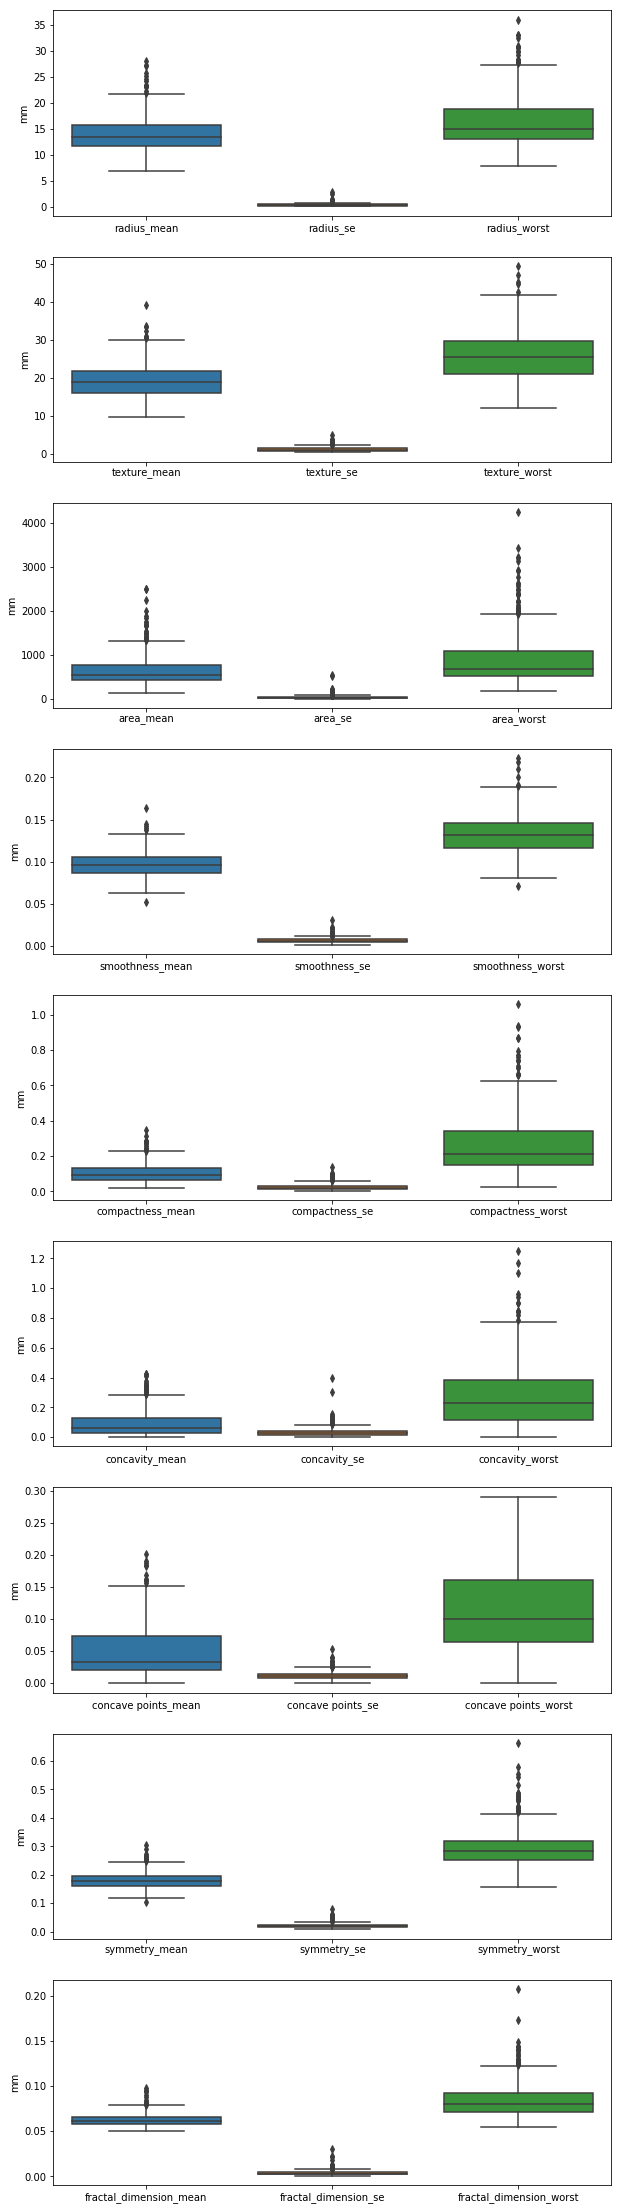

In [21]:
# Visualise summary statistics by drawing boxplots 

char = ['radius', 'texture', 'area', 'smoothness', 
          'compactness', 'concavity', 'concave points', 'symmetry', 'fractal_dimension']

fig = plt.figure(figsize=(10, 40))

for idx, col in enumerate(char):
    
    subset_cols = [col+'_mean', col+'_se', col+'_worst']
    
    ax = fig.add_subplot(len(char), 1, idx+1)
    sns.boxplot(data=breast_cancer_csv[subset_cols], ax=ax)
    ax.set_ylabel('mm')
    
plt.show()    

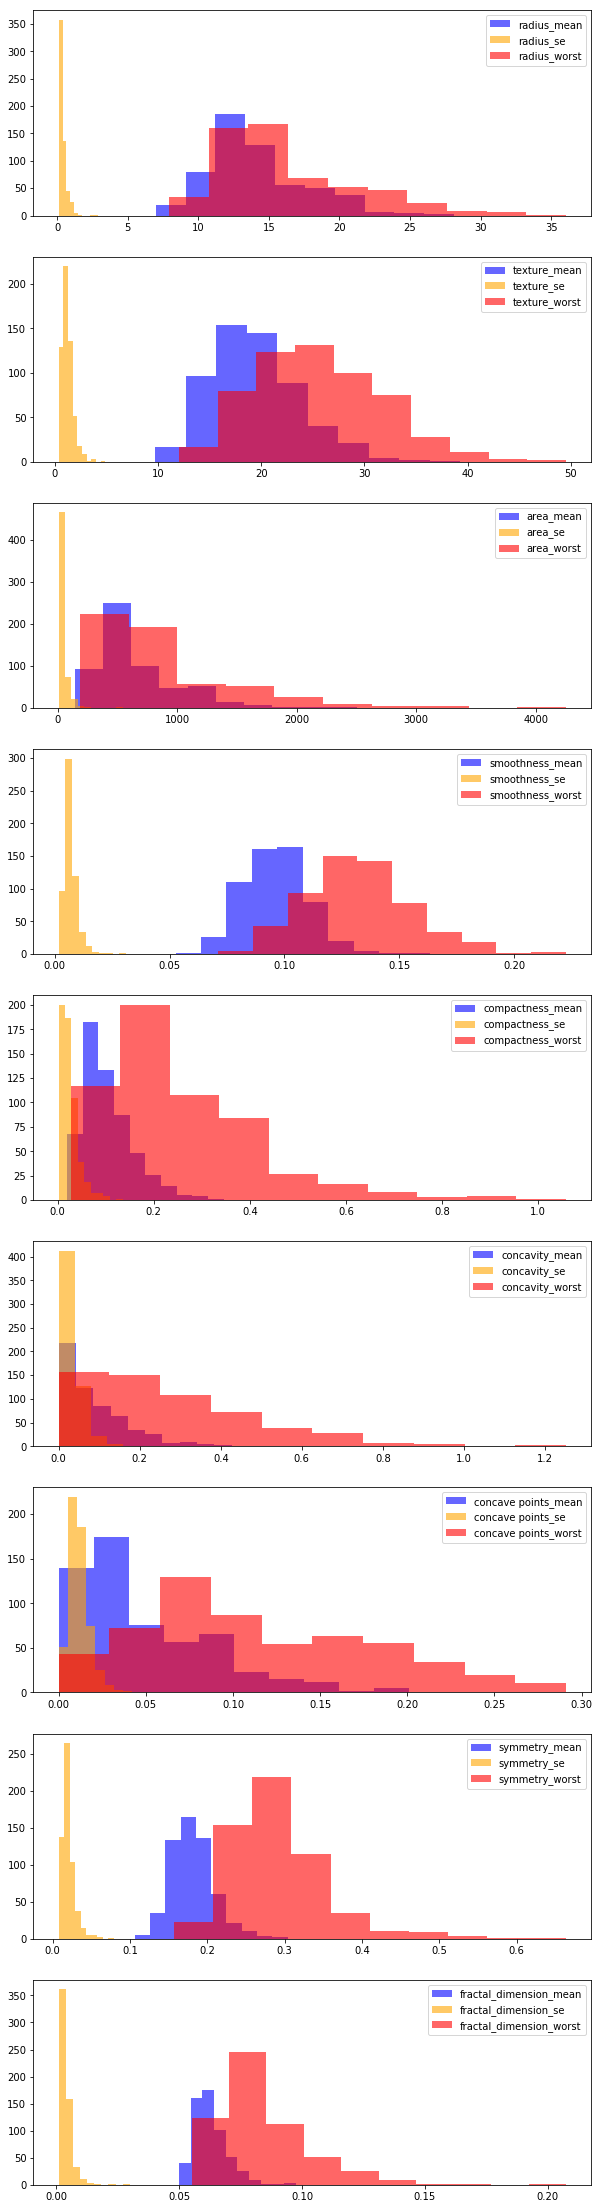

In [28]:
# Visualise distribution 

char = ['radius', 'texture', 'area', 'smoothness', 
          'compactness', 'concavity', 'concave points', 'symmetry', 'fractal_dimension']

fig = plt.figure(figsize=(10, 40))

for idx, col in enumerate(char):
    
    ax = fig.add_subplot(len(char), 1, idx+1)
    ax.hist(breast_cancer_csv[col+'_mean'], color='blue', alpha=0.6)
    ax.hist(breast_cancer_csv[col+'_se'], color='orange', alpha=0.6)
    ax.hist(breast_cancer_csv[col+'_worst'], color='red', alpha=0.6)
    
    ax.legend(loc='upper right')
    
plt.show()

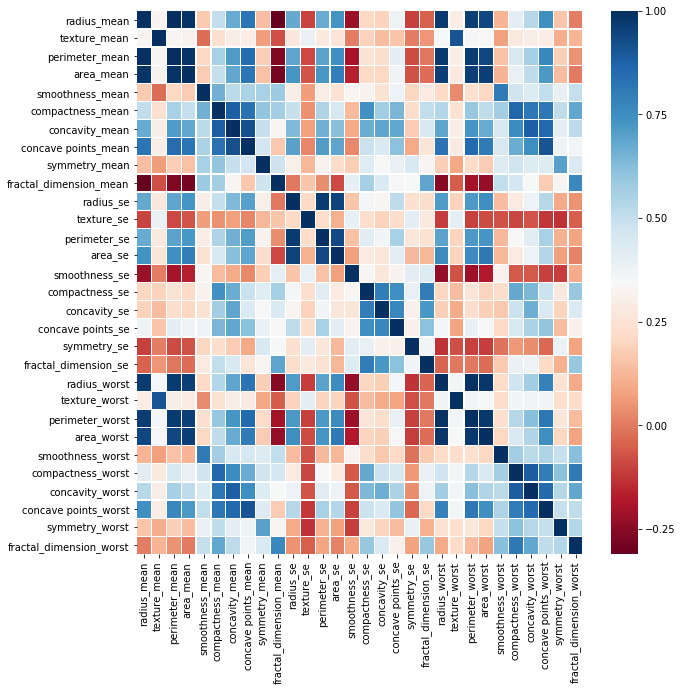

In [45]:
# Check for correlations 

plt.figure(figsize=(10, 10))
sns.heatmap(breast_cancer_csv.select_dtypes(include='float').corr(), linewidths=0.2, cmap='RdBu')
plt.show()

In [52]:
# take means as separate dataframe

means = breast_cancer_csv[breast_cancer_csv.columns[breast_cancer_csv.columns.str.contains('_mean$')]]

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [53]:
# Define predictors and target

X = means.drop(['radius_mean', 'perimeter_mean', 
                    'concave points_mean', 'concavity_mean', 'fractal_dimension_mean'], axis=1)
y = breast_cancer_csv['diagnosis']

In [54]:
# Standardise predictors

scaler = StandardScaler()

Xscale = scaler.fit_transform(X)

In [55]:
# Split data

X_train, X_test, y_train, y_test = train_test_split(Xscale, y, random_state=12)

In [56]:
# Instantiate model, fit and get predictions

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_preds = logreg.predict(X_test)

logreg_proba = logreg.predict_proba(X_test)

In [57]:
# Evaluate model accuracy

print("Accuracy: ", logreg.score(X_test, y_test))

Accuracy:  0.9020979020979021


In [58]:
# Get classification report

print(classification_report(y_test, logreg_preds))

             precision    recall  f1-score   support

          0       0.90      0.94      0.92        90
          1       0.90      0.83      0.86        53

avg / total       0.90      0.90      0.90       143



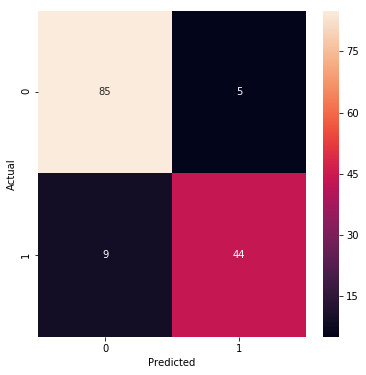

In [60]:
# Print confusion matrix

plot_confusion_matrix(y_test, logreg_preds)
plt.show()

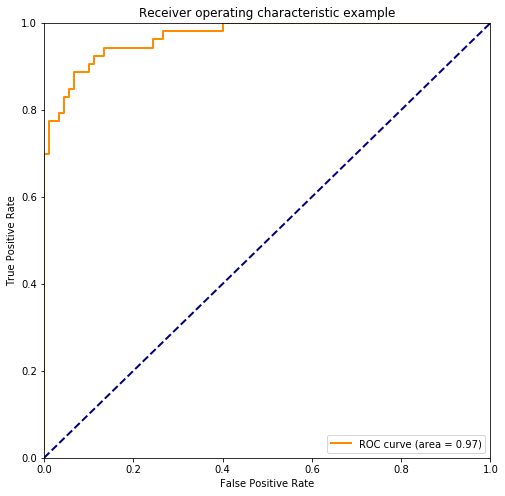

In [82]:
# Plot ROC curve

fig, ax = plt.subplots(figsize=(8, 8))

plot_roc_ax(y_test, logreg_proba[:, 1], ax=ax)
plt.show()

### 4. Support Vector Machine

#### 4.1 Use Support Vector Machine

Use Support Vector Machine and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [111]:
# Instantiate model, fit and get predictions

svc = SVC(probability=True)

svc.fit(X_train, y_train)

svc_preds = svc.predict(X_test)

svc_proba = svc.predict_proba(X_test)

In [112]:
# Evaluate model accuracy

print("Accuracy: ", svc.score(X_test, y_test))

Accuracy:  0.916083916083916


In [64]:
# Get classification report

print(classification_report(y_test, svc_preds))

             precision    recall  f1-score   support

          0       0.91      0.97      0.94        90
          1       0.94      0.83      0.88        53

avg / total       0.92      0.92      0.91       143



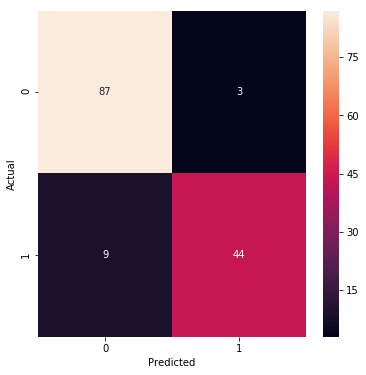

In [65]:
# Print confusion matrix

plot_confusion_matrix(y_test, svc_preds)
plt.show()

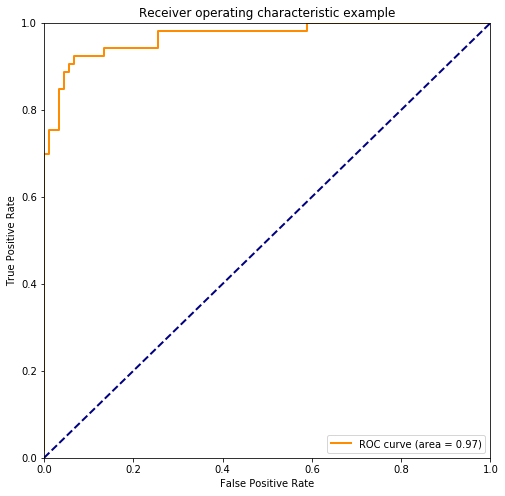

In [81]:
fig, ax = plt.subplots(figsize=(8, 8))

plot_roc_ax(y_test, svc_proba[:, 1], ax=ax)
plt.show()

### 4. Naive Bayes
#### 4.1 Use Naive Bayes

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [73]:
# Instantiate model, fit and get predictions

nb = GaussianNB()

nb.fit(X_train, y_train)

nb_preds = nb.predict(X_test)

nb_proba = nb.predict_proba(X_test)

In [74]:
# Evaluate model accuracy

print("Accuracy: ", nb.score(X_test, y_test))

Accuracy:  0.9090909090909091


In [75]:
# Get classification report

print(classification_report(y_test, nb_preds))

             precision    recall  f1-score   support

          0       0.91      0.96      0.93        90
          1       0.92      0.83      0.87        53

avg / total       0.91      0.91      0.91       143



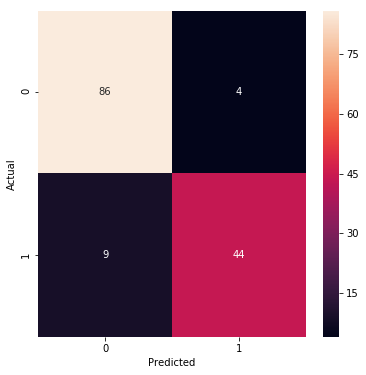

In [76]:
# Print confusion matrix

plot_confusion_matrix(y_test, nb_preds)
plt.show()

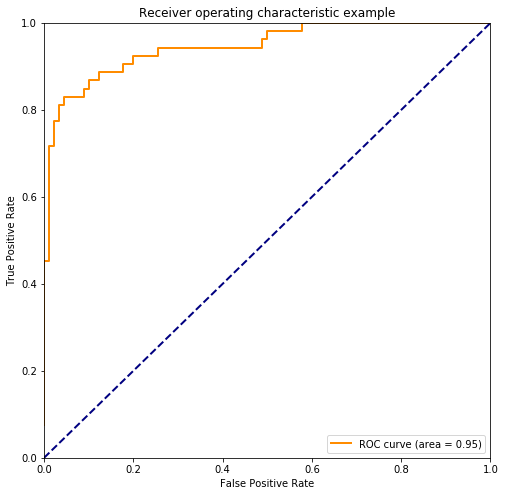

In [80]:
# Plot ROC curve

fig, ax = plt.subplots(figsize=(8, 8))

plot_roc_ax(y_test, nb_proba[:, 1], ax=ax)
plt.show()

### 6 Gridsearch optimal parameters for all three models.

Is there any difference between accuracy score of Logistic Regression and SVM? Use grid serach to find optimal parameter for both these models.

> Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

> It is possible and recommended to search the hyper-parameter space for the best cross validation score.

> https://scikit-learn.org/stable/modules/grid_search.html#grid-search

**Note:** It'll take time to execute this. After running the cell, wait for result.

#### 6.1 Find Best Estimator For Logistic Regression 

Find out how these parameters effect model. Find out the best estimator, score.

In [83]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

logreg_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5)

logreg_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [84]:
# print best params

logreg_gs.best_params_

{'C': 1, 'penalty': 'l2'}

In [85]:
# print score

logreg_gs.score(X_test, y_test)

0.9020979020979021

#### 6.2 Find Best Estimator For SVM

Find out how these parameters effect model. Find out the best estimator, score.

In [128]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [1, 0.5, 0.2, 0.1, 0.001, 0.0001],
    'kernel': ['linear', 'rbf']
}

svc_gs = GridSearchCV(SVC(probability=True), svc_params, cv=5)

svc_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100], 'gamma': [1, 0.5, 0.2, 0.1, 0.001, 0.0001], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [127]:
svc_gs.best_params_

{'C': 1, 'gamma': 10, 'kernel': 'linear'}

In [120]:
# print score

svc_gs.score(X_test, y_test)

0.9020979020979021

In [123]:
svc.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

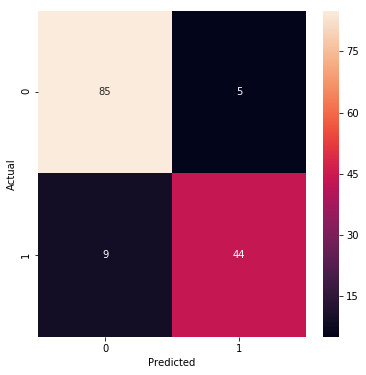

In [113]:
# Print confusion matrix

plot_confusion_matrix(y_test, svc_gs.predict(X_test))
plt.show()

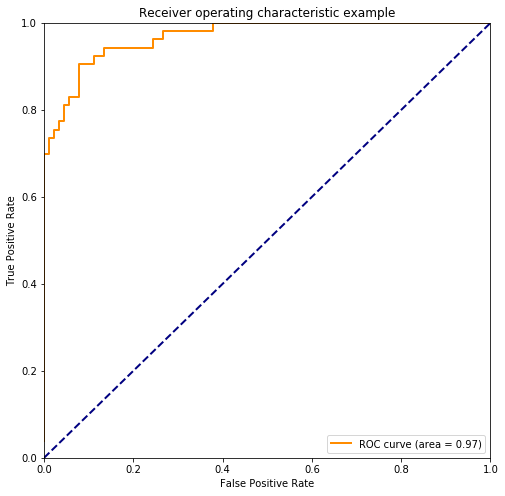

In [121]:
fig, ax = plt.subplots(figsize=(8, 8))

plot_roc_ax(y_test, svc_gs.predict_proba(X_test)[:, 1], ax=ax)
plt.show()

#### 6.3 Plot the ROC curve for the SVM, Logistic Regressions and Naive Bayes on the same plot

Find out which model performs better.

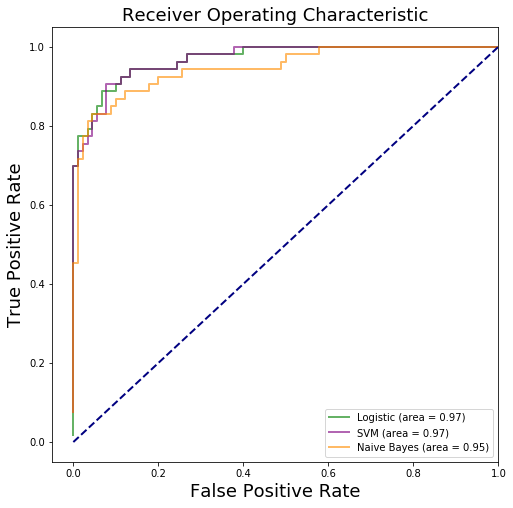

In [138]:
plt.figure(figsize=[8,8])

for i, mod in enumerate(zip([logreg_gs, svc_gs, nb], 
                            ['green', 'purple', 'darkorange'], 
                            ['Logistic', 'SVM', 'Naive Bayes'])):
    
    fpr, tpr, _ = roc_curve(y_test, mod[0].predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot the ROC Curve

    plt.plot(fpr, tpr, color=mod[1], lw=2, label = '{0} (area = {1:.2f})'.format(mod[2], roc_auc), alpha=0.6)

plt.plot([0, 1], [0, 1], color = 'navy', lw=2, linestyle = '--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 6. [BONUS] Learning Curve

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data.

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Look at the documentation for how to use this function in sklearn.

http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves

In [139]:
from sklearn.model_selection import learning_curve

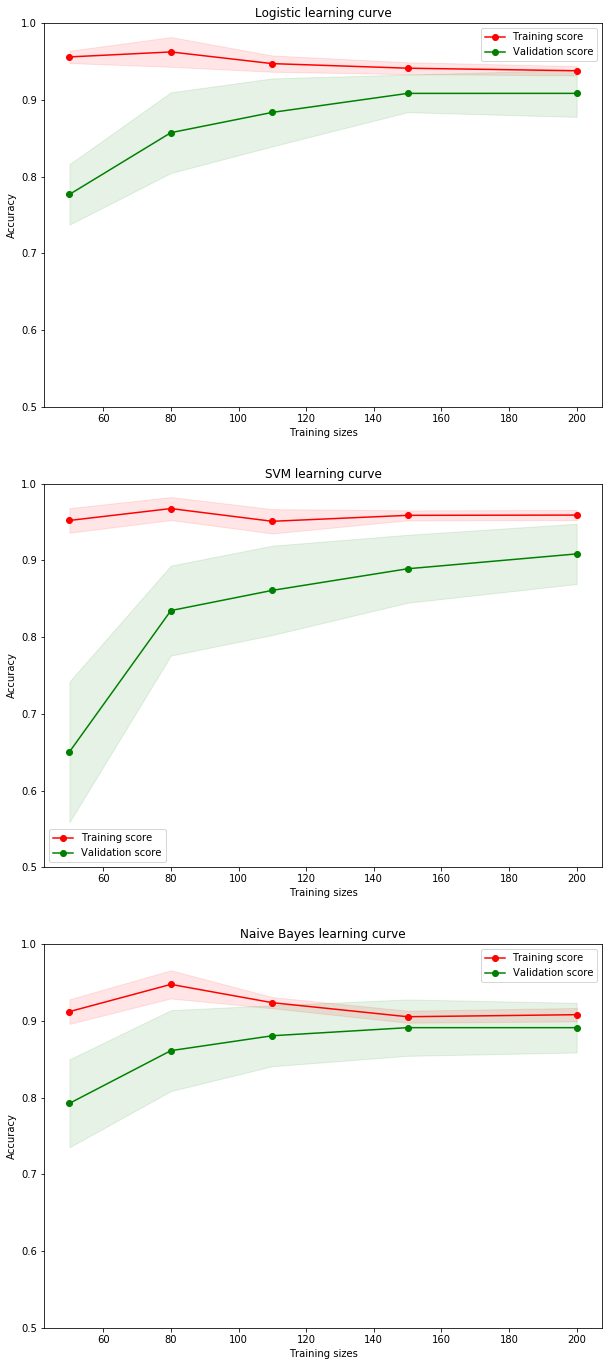

In [158]:
fig = plt.figure(figsize=(10,24))

for i, mod in enumerate(zip([logreg_gs, svc, nb], ['Logistic', 'SVM', 'Naive Bayes'])):
    
    # Get scores
    train_sizes, train_scores, valid_scores = learning_curve(mod[0], Xscale, y, 
                                                             train_sizes=[50, 80, 110, 150, 200], cv=5)
    
    # Find mean and standard deviations of train and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)
    
    # Start plotting
    ax = fig.add_subplot(3, 1, i+1)
    ax.set_ylim((0.5, 1))
    
    # Training scores: shade area where range is (mean-std, mean+std) and plot the mean score
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    ax.plot(train_sizes, train_scores_mean, marker='o', color='r', label='Training score')
    
    # Validation scores: shade area where range is (mean-std, mean+std) and plot the mean score
    ax.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes, valid_scores_mean, marker='o', color='g', label='Validation score')
    
    # Add format customisations
    ax.legend(loc='best')
    ax.set_title(mod[1] + " learning curve")
    ax.set_xlabel('Training sizes')
    ax.set_ylabel('Accuracy')
    
plt.show()    

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)

[In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

[Understanding Support Vector Machine algorithm from examples (along with code)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

[Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)

**© 2019 Data Science Institute of Australia**